# Scikit-multiflow

`scikit-multiflow` is an open source framework for multi-output/multi-label and stream data mining. It is being developed by  **Télécom ParisTech** and  **École Polytechique**. 
For this lab we will be using `scikit-multiflow`. Visit the page of the [framework](https://scikit-multiflow.github.io/) and follow the [installation guidelines](https://scikit-multiflow.github.io/scikit-multiflow/installation.html).
**Notice:** `scikit-multiflow` requires `NumPy`
Also, for this lab you will need: `pandas` and `matplotlib`.

# Classification in Data Streams

The goal of this lab is to build a classifier capable of learning and making predictions in a datastream using the `scikit-multiflow` framework. In this lab we are comparing three datastream classifiers on Electricity dataset:
- kNN
- Hoeffding Tree
- Batch-Incremental Ensemble Classifier (BIE)

The last of the three classifiers is not implemented yet. This is the task of this lab. You should implement the `predict` and `partial_fit` functions in the `BatchClassifier` class. Implement a tumbling window of size 100, creating and maintaining up to a maximum of 100 models. Build a `DecisionTreeClassifier` on each of the batches/windows.

In [1]:
from numpy import *
import numpy as np

from sklearn.tree import DecisionTreeClassifier

class BatchClassifier:

    def __init__(self, window_size=100, max_models=100):
        self.H = []
        self.h = None
        # TODO
        self.window_size=window_size
        self.max_models=max_models
        self.X_batch=None
        self.y_batch=None

    def partial_fit(self, X, y=None, classes=None):
        # TODO 
        # if not initialized ...
            # Setup 
        N,D = X.shape
        
        if not self.h:
            self.X_batch = zeros((self.window_size,D))
            self.y_batch = zeros(self.window_size)
            self.h=0
        # N.B.: The 'classes' option is not important for this classifier
        
        for i in range(N):
            self.X_batch[self.h] = X[i]
            self.y_batch[self.h] = y[i]
            self.h+=1
            if self.h==self.window_size:    
                h = DecisionTreeClassifier()
                h.fit(self.X_batch,self.y_batch)
                self.H.append(h)# <-- and append it to the ensemble
                if len(self.H)==self.max_models:
                    self.H=self.H[1:]
                self.h=0
        return self

    def predict(self, X):
        # TODO 
        N, D = X.shape
        a = np.zeros(shape=(N,len(self.H)))
        b = np.zeros(shape=(N,1))
        for i in range(len(self.H)):
            a[:,i]=self.H[i].predict(X)
        for i in range(N):
            val,count=np.unique(a[i], return_counts=True)
            b[i]=val[np.argmax(count)]
    
        # You also need to change this line to return your prediction instead of 0s:
        return b

## Evaluation

The following piece of code evaluates the three classifiers and gives the online visualization. It computes the current and global values for `accuracy` and `kappa`. Current value of selected evaluation measure represents the performance of the model on the current window and global value represents the performance of the model on whole datastream. `EvaluatePrequential` also gives the summary of evaluation showing the `Evaluation Time`. It, also, writes the metrics data into a file `result_elec.csv` which will be used in the next part to generate plots for comparing current and global performance of the classifiers.

In [2]:
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.lazy.knn_adwin import KNNAdwin, KNN
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from skmultiflow.data.file_stream import FileStream
import matplotlib as plt

plt.interactive(True)

dataset = "elec"

# 1. Create a stream

stream = FileStream("./data/"+dataset+".csv", n_targets=1, target_idx=-1)
# 2. Prepare for use
stream.prepare_for_use()
# 2. Instantiate the HoeffdingTree classifier
h = [
        KNN(n_neighbors=10, max_window_size=100, leaf_size=30),
        HoeffdingTree(),
        BatchClassifier(window_size=100, max_models=100),
     ]

# 3. Setup the evaluator

evaluator = EvaluatePrequential(pretrain_size=1000, max_samples=20000, show_plot=True, 
                                metrics=['accuracy', 'kappa'], output_file='result_'+dataset+'.csv', 
                                batch_size=1)
# 4. Run
evaluator.evaluate(stream=stream, model=h)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #------------------- [5%] [0.11s]

<Figure size 900x500 with 2 Axes>

<Figure size 640x480 with 0 Axes>

 ##------------------ [10%] [1.47s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ###----------------- [15%] [3.09s]

<Figure size 640x480 with 0 Axes>

 ####---------------- [20%] [5.01s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #####--------------- [25%] [7.28s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ######-------------- [30%] [9.86s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #######------------- [35%] [12.76s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ########------------ [40%] [15.98s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #########----------- [45%] [19.54s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ##########---------- [50%] [23.60s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ###########--------- [55%] [27.89s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ############-------- [60%] [31.97s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #############------- [65%] [36.01s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ##############------ [70%] [40.36s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ###############----- [75%] [44.65s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ################---- [80%] [48.96s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #################--- [85%] [52.99s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ##################-- [90%] [57.04s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 ###################- [95%] [61.34s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 #################### [100%] [65.64s]
Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.7349
M0 - Kappa        : 0.4516
M1 - Accuracy     : 0.8148
M1 - Kappa        : 0.6173
M2 - Accuracy     : 0.8123
M2 - Kappa        : 0.6139


## Generating plots

The code given below is using the file `result_elec.csv` created by the `Evaluateprequential` in the previous section to generate the plots for current and global values of `accuracy` and `kappa` and generates the `.pdf` file of the figure. 

write out to elec ....pdf


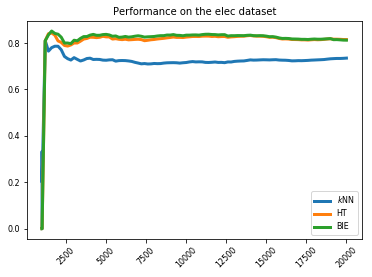

In [3]:
import pandas as pd
from matplotlib.pyplot import *

dataset = "elec"

df = pd.read_csv('result_'+dataset+'.csv', comment='#')
ax = df.plot(x="id", y=["mean_acc_[M0]","mean_acc_[M1]","mean_acc_[M2]"], rot=45, linewidth=3, title=dataset)
#ax = df.plot(x="id", y=["current_acc_[M0]", "current_acc_[M1]", "current_acc_[M2]"], rot=30, linewidth=3, title=dataset)
#ax = df.plot(x="id", y=["mean_kappa_[M0]","mean_kappa_[M1]","mean_kappa_[M2]"], rot=45, linewidth=3, title=dataset)
#ax = df.plot(x="id", y=["current_kappa_[M0]", "current_kappa_[M1]", "current_kappa_[M2]"], rot=30, linewidth=3, title=dataset)
ax.set_xlabel("")
ax.set_title("Performance on the %s dataset" % dataset)
ax.legend([r"$k$NN", "HT", "BIE"], loc='best')
print("write out to %s ..." % dataset+".pdf")
savefig("result_"+dataset+".pdf")
show()

## Deliverables

You should submit:
1. The Jupyter Notebook 
2. `html` version of notebook (go to: `File/Download as/HTML`), with visible outputs of your code

in a compressed file (`.zip`, `.rar`, `tar.gz`...), and compressed file should be named: `firstname_lastname_lab2.zip`